In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [26]:
df = pd.read_csv('data/student_admission_dataset.csv')
df.head()

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [28]:

encoder = LabelEncoder()
df["Admission_Status"] = encoder.fit_transform(df["Admission_Status"])

mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Encoding mapping:", mapping)

df.head()


Encoding mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}


,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,1
1,2.54,974,8,1
2,2.91,909,9,1
3,2.83,1369,5,0
4,3.60,1536,7,0


In [23]:
df

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,1
1,2.54,974,8,1
2,2.91,909,9,1
3,2.83,1369,5,0
4,3.60,1536,7,0
...,...,...,...,...
245,3.57,1024,3,1
246,2.86,1367,1,2
247,3.09,1036,3,2
248,3.51,1375,5,2


In [29]:
X = df[["GPA", "SAT_Score", "Extracurricular_Activities"]].values
y = df["Admission_Status"].values

In [30]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [31]:

log_reg = LogisticRegression(multi_class="ovr", max_iter=500)
log_reg.fit(X_train, y_train)



c:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='ovr')

In [32]:

y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (with all features): {acc:.2f}")



Model Accuracy (with all features): 0.41


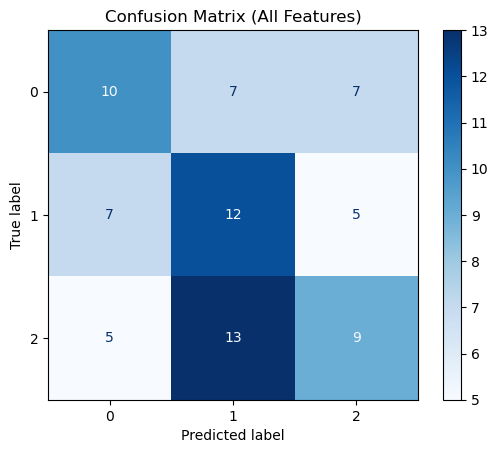

In [33]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (All Features)")
plt.show()